#                                     Lead Scoring Case Study

## Problem Statement

There is Eductaion Company named X-Education which generates Leads to many sources and provides it to sales team 
The sales team then contacts the leads and converts them but the current conversion rate is very low around 30%
The requirement is to build a logestic regression model to which generate a score of 0-100 for every lead and
conversion rate is increased approximately to 80%

# Steps 

#### 1. Data Reading and understanding
#### 2. Data Cleaning and EDA
#### 3. Data Preparation for Modelling (Making Dummy Variables and Scaling the Data)
#### 4. Model Building
#### 5. Model Evaluation

#### Imporing all the required libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. Data Reading and Understanding

In [3]:
leads = pd.read_csv('Leads.csv')

In [4]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.shape

(9240, 37)

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Here we can see that there are missing values in the dataset also there are select values which are to be considered as missing values as per the problem statement reason being that they were not selected by leads and are captured as select

Looking at the numerical columns of the Data set

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


###### Looking at the unique values in dataset

In [8]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

1. Looking at the unique values we can drop "Prospect ID" and "Lead Number" as they are unique ID's assigned to each lead and will not be useful for Model buildinng
2. Dropping Columns "Magazine", "Update me on Supply Chain Content", "Get updates on DM Content", "Receive More Updates About Our Courses", "I agree to pay the amount through cheque" as they have a single unique value and will make no contribution to the model building

# 2. Data Cleaning and EDA

In [9]:
#making a list of columns which needs to be dropped from data set
drop_cols = ["Magazine", "Update me on Supply Chain Content", "Get updates on DM Content", 
             "Receive More Updates About Our Courses", "I agree to pay the amount through cheque",
             "Prospect ID", "Lead Number" ]

Changing the select values in the data set to NaN values

In [10]:
# finding the coloumns which have select values
for col in leads.columns:
    if "Select" in leads[col].values:
        print(col)

Specialization
How did you hear about X Education
Lead Profile
City


In [11]:
# replacing "Select values" with NaN values
leads.replace("Select",np.NaN, inplace = True)

In [12]:
# Checking if the columns have "Select" value
for col in leads.columns:
    if "Select" in leads[col].values:
        print(col)

##### Cleaning the Missing Values in the Data Set

In [13]:
round(100*leads.isna().mean().sort_values(ascending = False),2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

1. Dropping the columns which has more than 30% of missing values

In [14]:
missing_val_cols = list(leads.columns[100*leads.isnull().mean()>30])

In [15]:
# updating the drop_cols list
for col in missing_val_cols:
    drop_cols.append(col)
drop_cols

['Magazine',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Receive More Updates About Our Courses',
 'I agree to pay the amount through cheque',
 'Prospect ID',
 'Lead Number',
 'Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

Treating the other missing value columns

In [16]:
missing_cat_cols = ['Lead Source', 'Last Activity', 'Country', 'What is your current occupation',
                    'What matters most to you in choosing a course']

In [17]:
for colomun in missing_cat_cols:
    print(f"*******{colomun}*******")
    print()
    print(leads[colomun].value_counts(dropna = False))
    print()
    print('='*50)
    print()

*******Lead Source*******

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


*******Last Activity*******

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unrea

1. Lead Source:  
Changing google to Google and 
bing,Click2call,Press_Release,Social Media,Live Chat,youtubechannel,testone,Pay per Click Ads,welearnblog_Home,WeLearn,blog,NC_EDM and NaN to Other as they have very less Count

In [18]:
leads['Lead Source'].replace('google','Google',inplace = True)
less_count = ['bing', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'youtubechannel',
              'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM']
leads['Lead Source'].replace(less_count,'Other',inplace = True)
leads['Lead Source'].replace(np.NaN,'Other',inplace = True)
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other                 59
Facebook              55
Name: Lead Source, dtype: int64

2. Last Activity:
    Changing NaN value and all the less count values to other

In [19]:
less_count = ['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
              'View in browser link Clicked','Email Received','Email Marked Spam',
              'Visited Booth in Tradeshow','Resubscribed to emails']
leads['Last Activity'].replace(less_count,'Other',inplace = True)
leads['Last Activity'].replace(np.NaN,'Other',inplace = True)
leads['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Other                         308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

3. Country:
    Data is highly skewed towards India keeping the column will effect the data model hence dropping it

In [20]:
# adding to drop_cols
drop_cols.append('Country')
drop_cols

['Magazine',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Receive More Updates About Our Courses',
 'I agree to pay the amount through cheque',
 'Prospect ID',
 'Lead Number',
 'Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Country']

4. What is your current occupation: Changing NaN values to Other

In [21]:
leads['What is your current occupation'].replace(np.NaN,'Other',inplace = True)
leads['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

5. What matters most to you in choosing a course: Data is highly skewed towards Better Career Prospects keeping the column will effect the data model hence dropping it

In [22]:
drop_cols.append('What matters most to you in choosing a course')
drop_cols

['Magazine',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Receive More Updates About Our Courses',
 'I agree to pay the amount through cheque',
 'Prospect ID',
 'Lead Number',
 'Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Country',
 'What matters most to you in choosing a course']

Dropping all the above columns

In [23]:
leads = leads.drop(drop_cols,axis =1)

In [24]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Search                                  9240 non-null   obje

Checking the Other Two Numeric columns missing values

In [25]:
print(round(100*leads['Page Views Per Visit'].isna().mean(),2))
print(round(100*leads['TotalVisits'].isna().mean(),2))

1.48
1.48


Since the percentage of missing values is very low dropping the rows with missing values

In [26]:
leads.dropna(inplace = True)

In [27]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Do Not Call                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Search                                  9103 non-null   obje

Now the data is clean with no missing values

Checking the categorical column with values as less count and high skewness and correcting them by dropping or imputing them to build a less biased model

In [28]:
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Digital Advertisement',
           'What is your current occupation', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
           'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity']

*******Lead Origin*******

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64


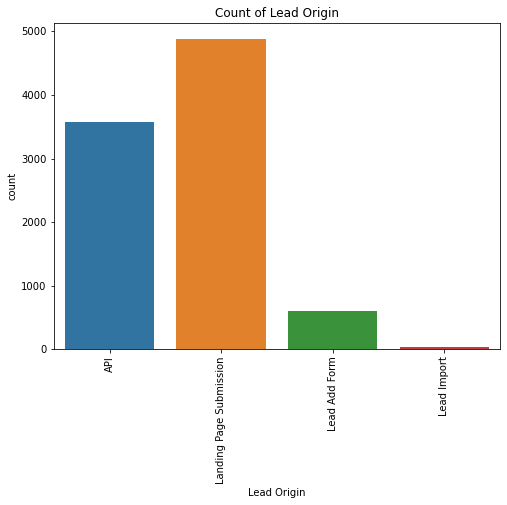

*******Lead Source*******

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Other                 52
Facebook              31
Name: Lead Source, dtype: int64


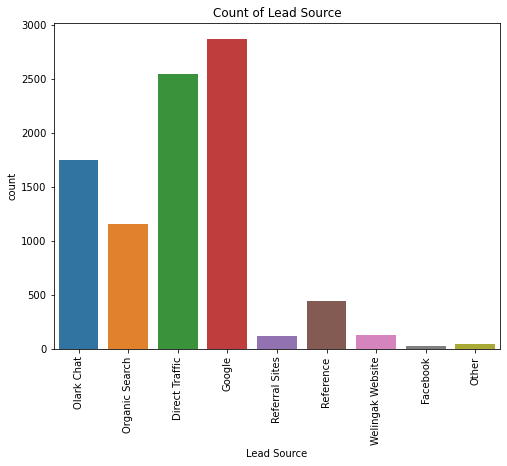

*******Do Not Email*******

No     8379
Yes     724
Name: Do Not Email, dtype: int64


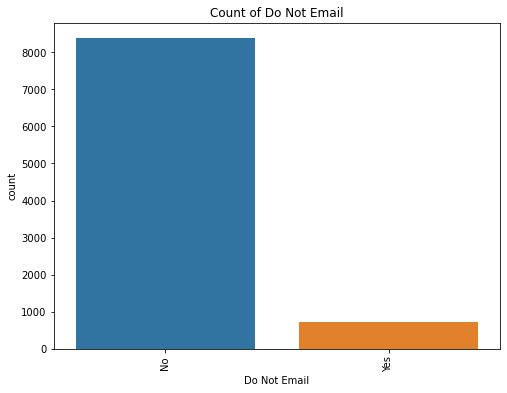

*******Do Not Call*******

No     9101
Yes       2
Name: Do Not Call, dtype: int64


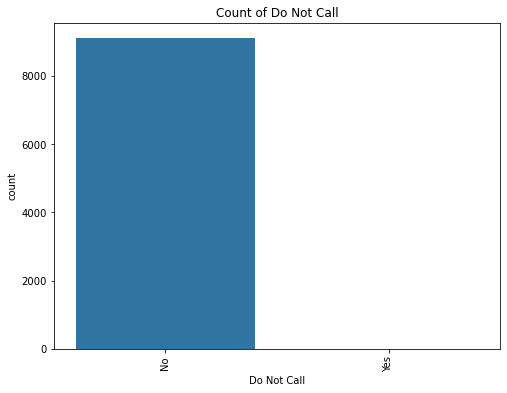

*******Last Activity*******

Email Opened                 3437
SMS Sent                     2738
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Other                         193
Form Submitted on Website     116
Name: Last Activity, dtype: int64


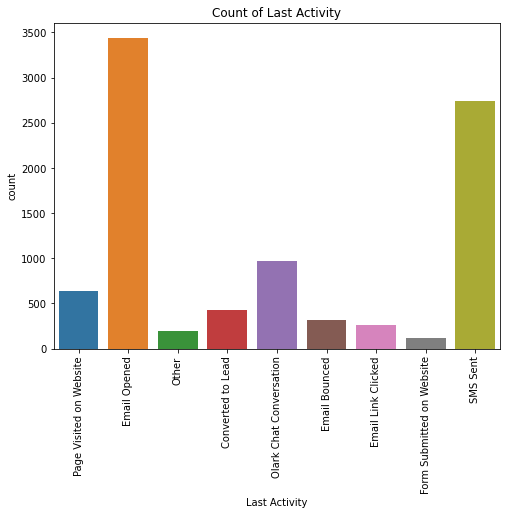

*******Digital Advertisement*******

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64


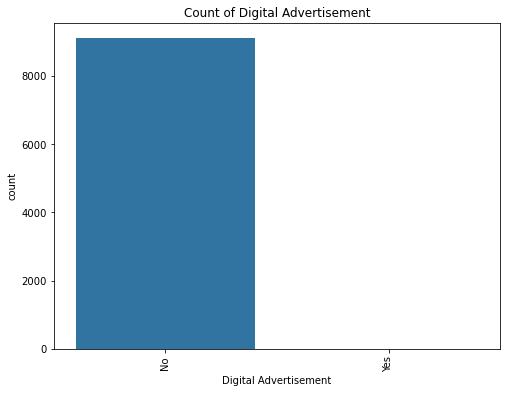

*******What is your current occupation*******

Unemployed              5502
Other                   2698
Working Professional     679
Student                  207
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


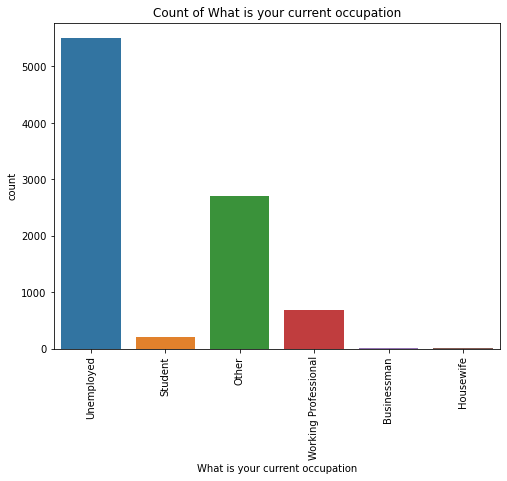

*******Search*******

No     9089
Yes      14
Name: Search, dtype: int64


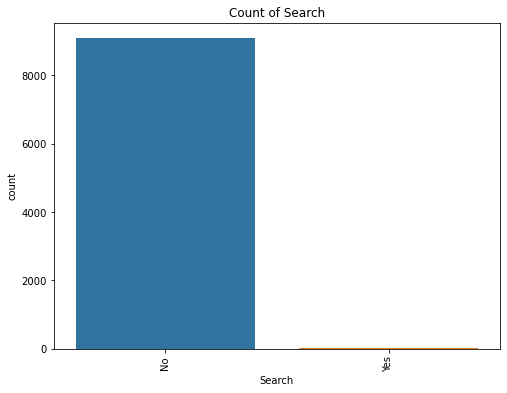

*******Newspaper Article*******

No     9101
Yes       2
Name: Newspaper Article, dtype: int64


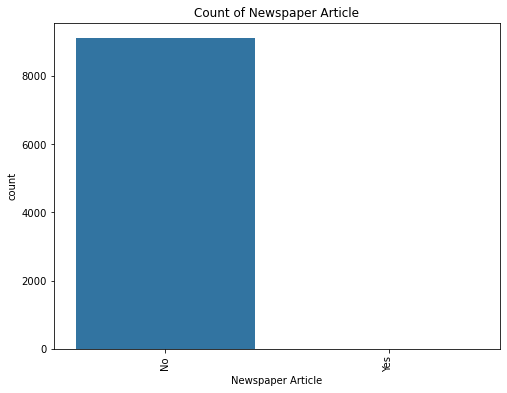

*******X Education Forums*******

No     9102
Yes       1
Name: X Education Forums, dtype: int64


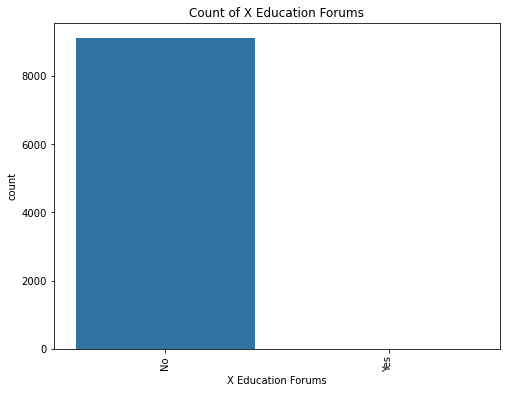

*******Newspaper*******

No     9102
Yes       1
Name: Newspaper, dtype: int64


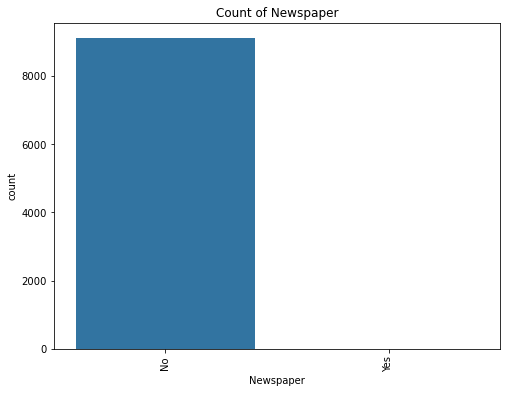

*******Through Recommendations*******

No     9096
Yes       7
Name: Through Recommendations, dtype: int64


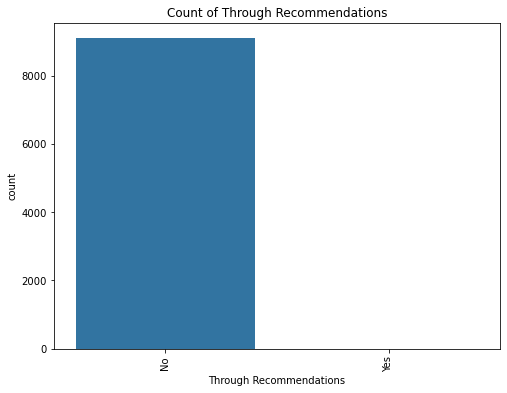

*******A free copy of Mastering The Interview*******

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


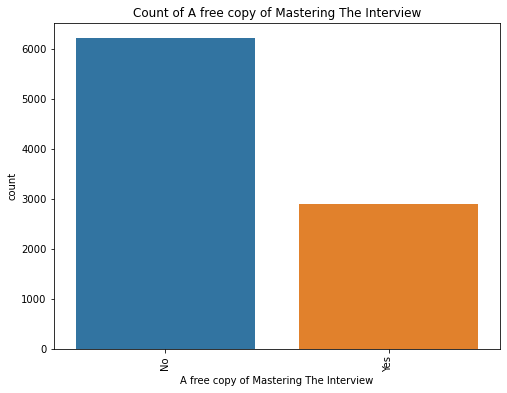

*******Last Notable Activity*******

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64


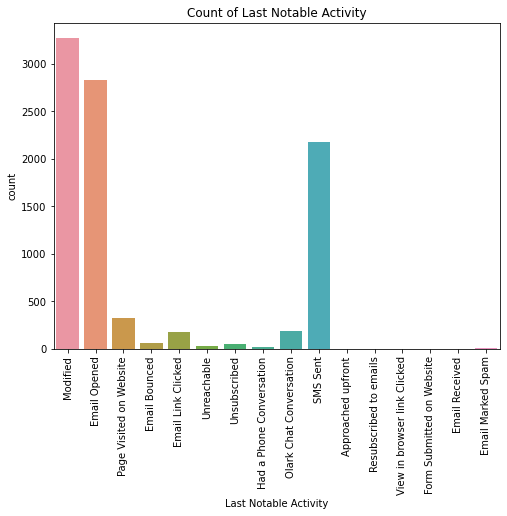

In [29]:
for col in cat_cols:
    print(f"*******{col}*******")
    print()
    print(leads[col].value_counts(dropna = False))
    plt.figure(figsize=(8,6))
    sns.countplot(leads[col])
    plt.title(f'Count of {col}')
    plt.xticks(rotation = 90)
    plt.show()

From the above data and graphs we can see the following
- Columns 'Do Not Call', 'Digital Advertisement', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Through Recommendations' are highly skewed keeping these columns will make the model biased hence dropping them.
- Columns 'Last Notable Activity' and 'Last Activity' are similar and highly correlated hence dropping 'Last Notable Activity'

In [30]:
final_drop_cols = [ 'Do Not Call', 'Digital Advertisement', 
                   'Search', 'Newspaper Article', 'X Education Forums', 
                   'Newspaper', 'Through Recommendations', 'Last Notable Activity']

In [31]:
leads = leads.drop(final_drop_cols,axis =1)

In [32]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 782.3+ KB


Now the data is clean of Missing Values and all the unnecessary columns are dropped 

##### Outlier Treatment

In [33]:
Num_cols = ['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website']

Checking for Outliers

*****Page Views Per Visit*****


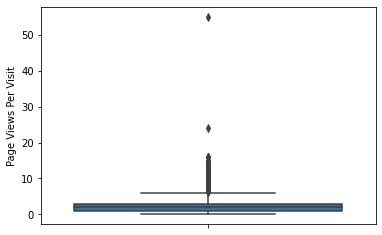

**************************************************

*****TotalVisits*****


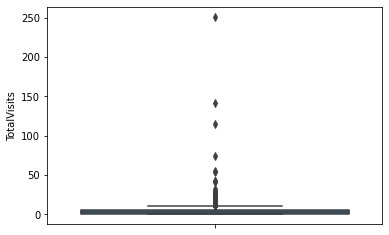

**************************************************

*****Total Time Spent on Website*****


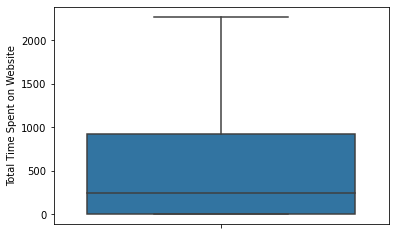

**************************************************



In [34]:
for col in Num_cols:
    print(f'*****{col}*****')
    sns.boxplot(y=leads[col])
    plt.show()
    print("*" * 50)
    print()

from the above box plotw we can see there are outliers in 'Page Views Per Visit' and 'TotalVisits'

Removing these Outliers by flooring the lower quantile to 25% and capping upper quantile to 75%

In [35]:
#Page Views Per Visit
q1 = leads['Page Views Per Visit'].describe()["25%"]
q3 = leads['Page Views Per Visit'].describe()["75%"]
IQR = q3 - q1

upper_quantile = q3 + 1.5*IQR
lower_quantile = q1 - 1.5*IQR

#removng values greater than upper quantile 
leads['Page Views Per Visit'] = np.where(leads['Page Views Per Visit'] > upper_quantile, upper_quantile,leads['Page Views Per Visit'])

#removng values less than lower quantile 
leads['Page Views Per Visit'] = np.where(leads['Page Views Per Visit'] < lower_quantile, lower_quantile,leads['Page Views Per Visit'])

In [36]:
#TotalVisits
q1 = leads['TotalVisits'].describe()["25%"]
q3 = leads['TotalVisits'].describe()["75%"]
IQR = q3 - q1

upper_quantile = q3 + 1.5*IQR
lower_quantile = q1 - 1.5*IQR

#removng values greater than upper quantile 
leads['TotalVisits'] = np.where(leads['TotalVisits'] > upper_quantile, upper_quantile,leads['TotalVisits'])

#removng values less than lower quantile 
leads['TotalVisits'] = np.where(leads['TotalVisits'] < lower_quantile, lower_quantile,leads['TotalVisits'])

Now that the Outliers are cleaned looking at Boxplots again

*****Page Views Per Visit*****


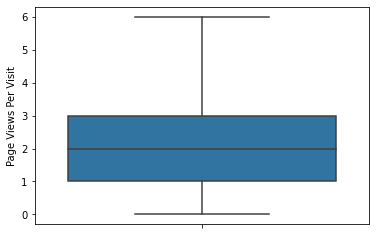

**************************************************

*****TotalVisits*****


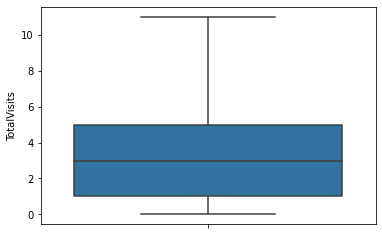

**************************************************

*****Total Time Spent on Website*****


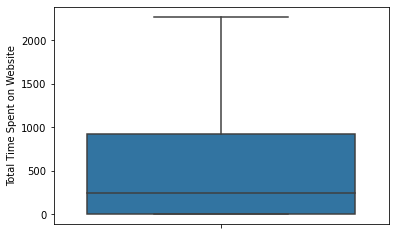

**************************************************



In [37]:
for col in Num_cols:
    print(f'*****{col}*****')
    sns.boxplot(y=leads[col])
    plt.show()
    print("*" * 50)
    print()

# Exploratory Data Analysis

In [38]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No


In [39]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 782.3+ KB


In [40]:
final_cat_cols = ['Lead Origin', 'Lead Source', 'Last Activity','Do Not Email', 
                  'What is your current occupation', 'A free copy of Mastering The Interview']
final_num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

#### Performing Univariate Analysis on all the categorical columns

Checking the total leads converted in the given data set

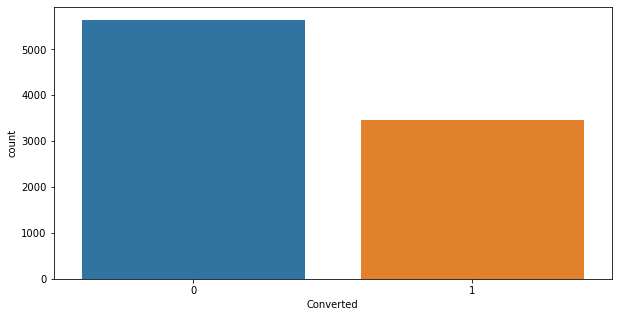

0    5642
1    3461
Name: Converted, dtype: int64
Percentage of leads converted 38.02


In [41]:
plt.figure(figsize=[10,5])
sns.countplot(x="Converted",data=leads)
plt.show()
print(leads['Converted'].value_counts())
percentage = 100 *(leads['Converted'].sum()/len(leads['Converted']))
print(f'Percentage of leads converted {round(percentage,2)}')

From the above data we can see that 38% of leads got converted the percentage of conversion is very low

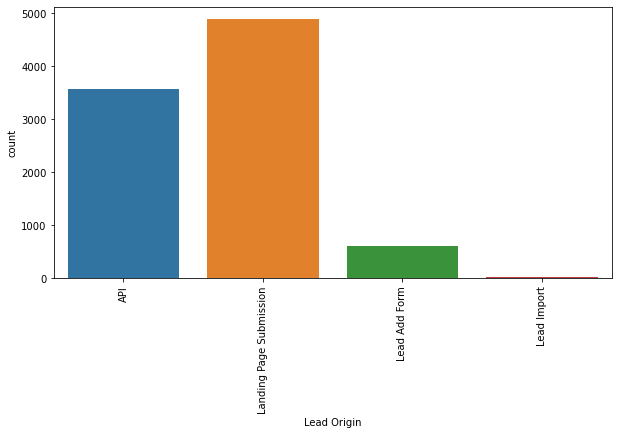

**************************************************


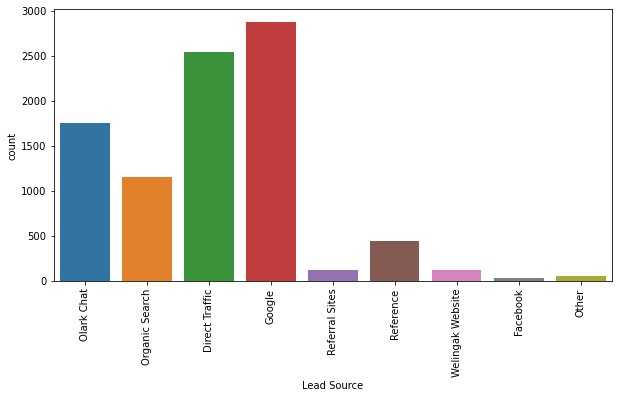

**************************************************


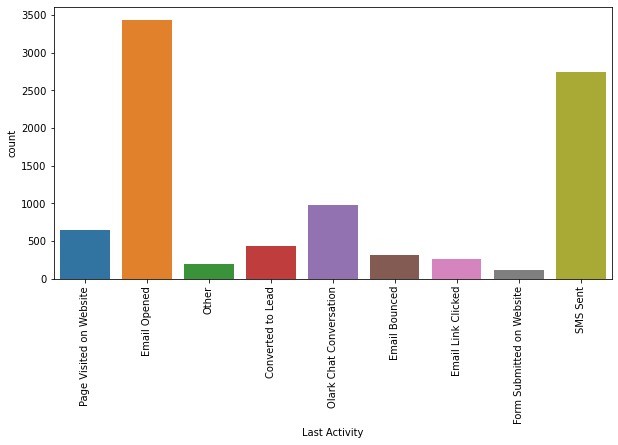

**************************************************


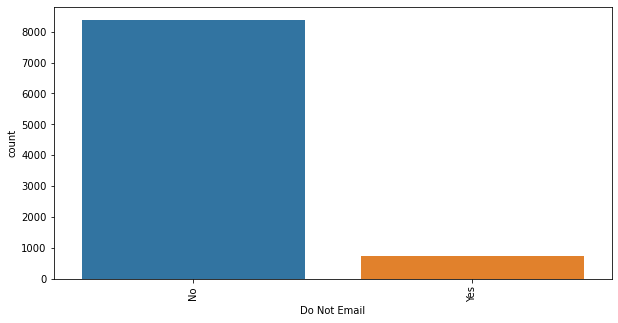

**************************************************


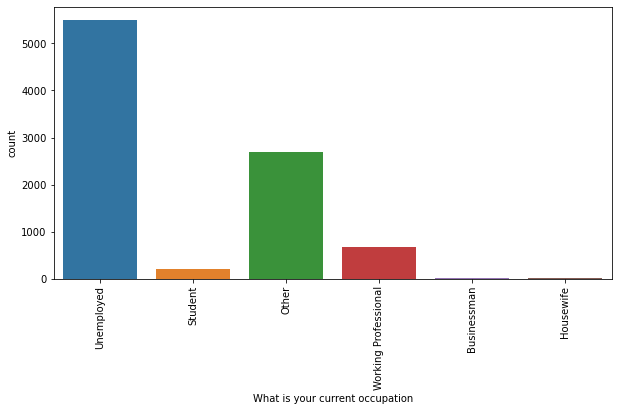

**************************************************


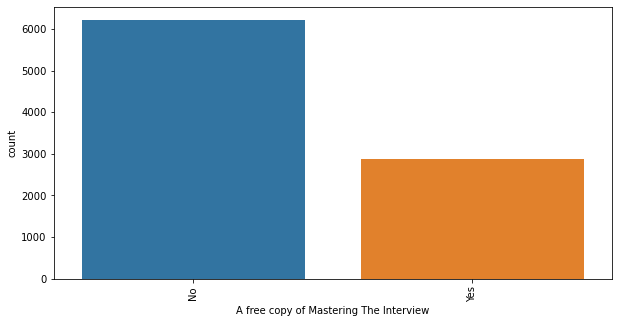

**************************************************


In [42]:
for col in final_cat_cols:
    plt.figure(figsize=[10,5])
    sns.countplot(x=col,data=leads)
    plt.xticks(rotation=90)
    plt.show()
    print('*' * 50)

from the above bar plots we can interpret the following points

1. Landing Submission page is the major factor for lead Origin followed by API
2. Google, Direct Traffic, Olark Chat are the major Lead sources
3. Last Activity captured for the most of the leads is Email Opened followed by SMS Sent
4. Most of the leads are unemployed
5. Leads choose for No Emails and No Free Copy of Marstering the Interview Majorly

##### Bivariate Analysis on Catgorical Columns

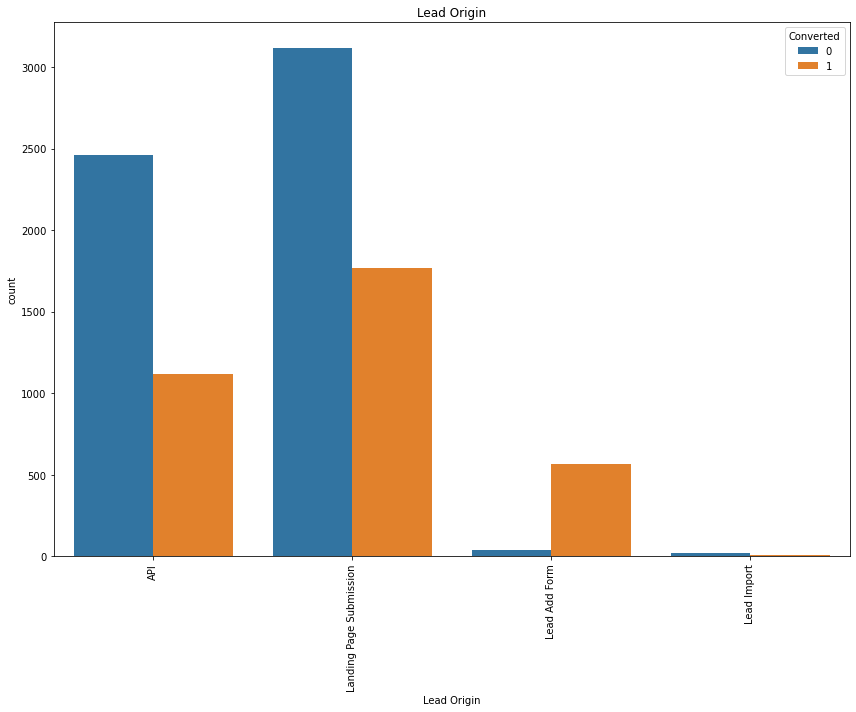

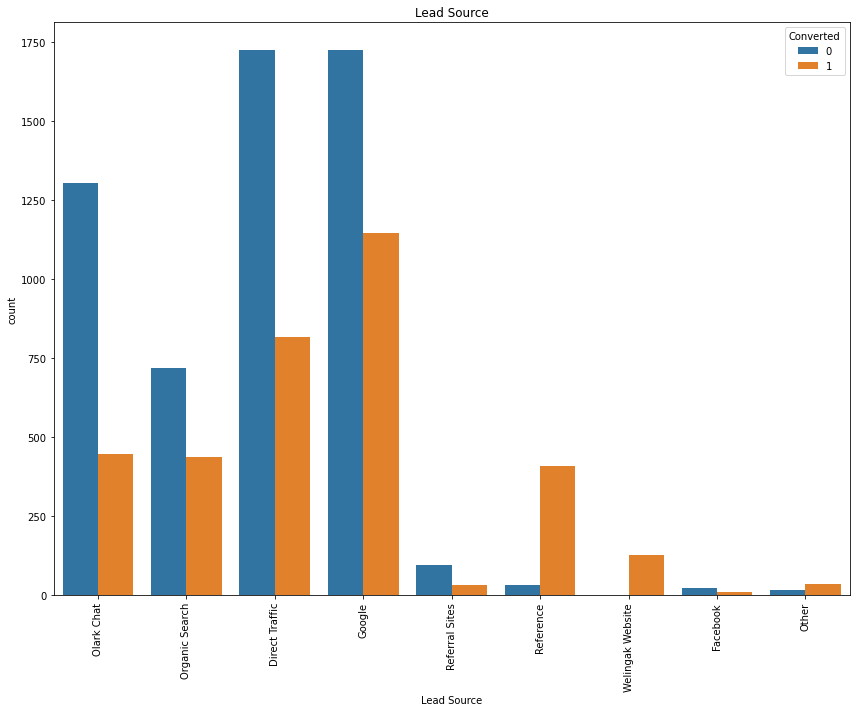

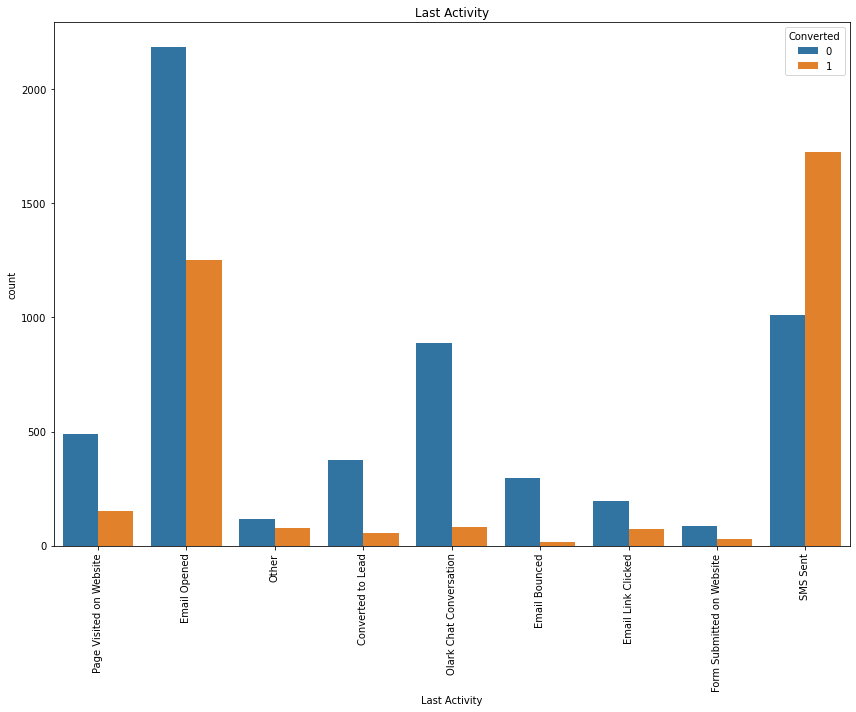

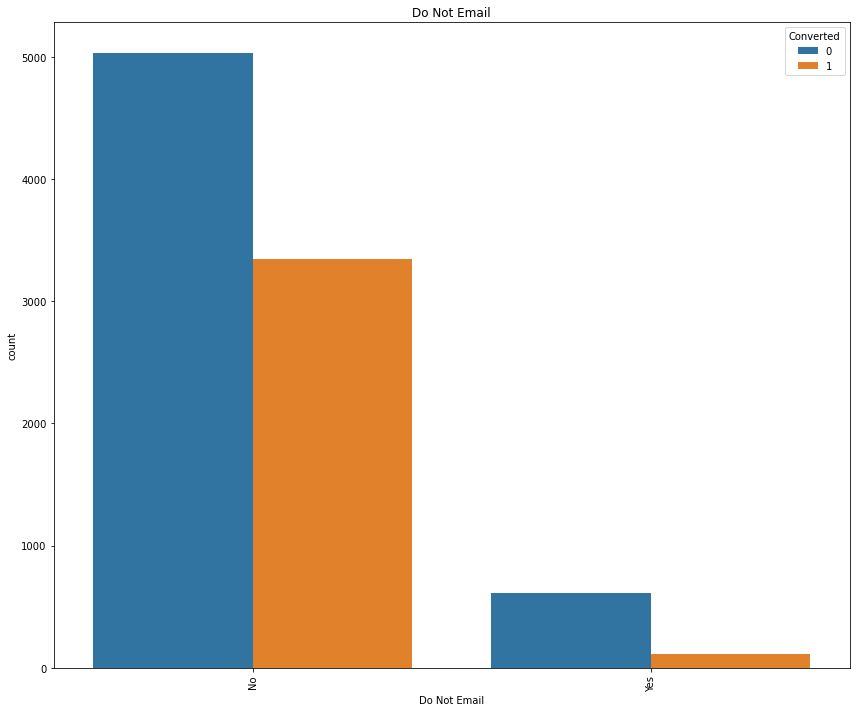

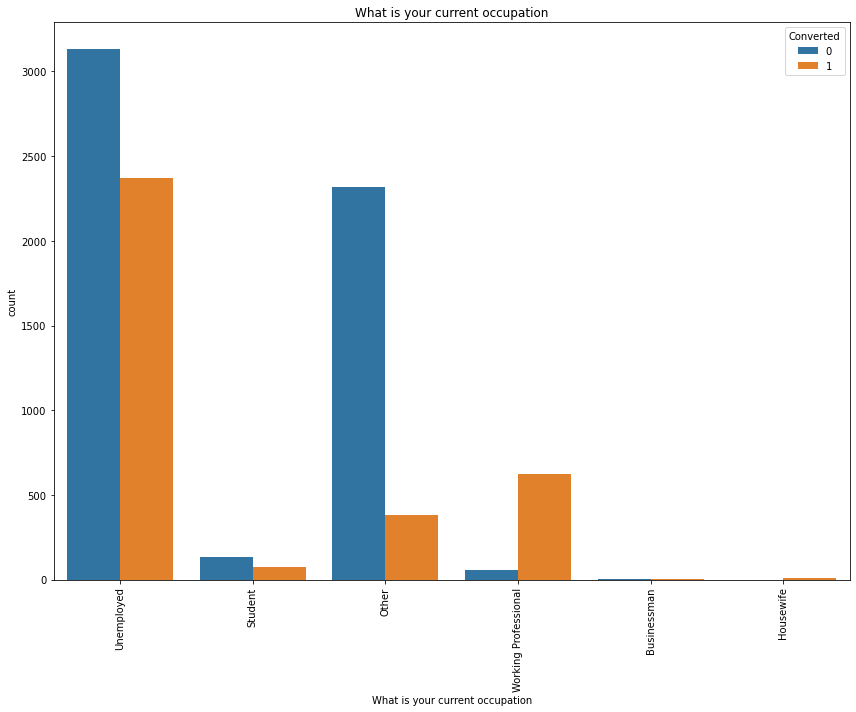

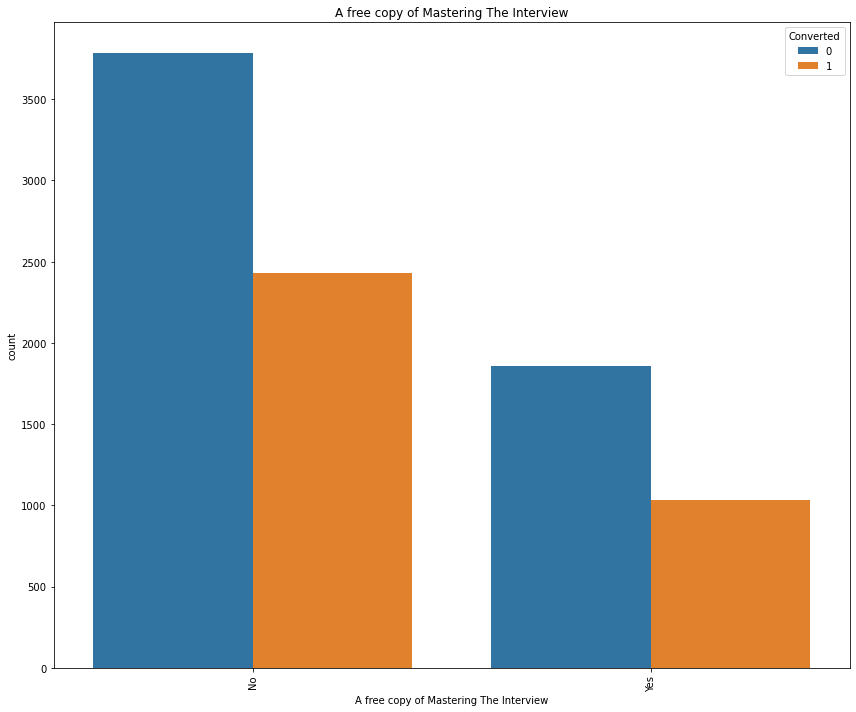

In [43]:
for col in final_cat_cols:
    plt.figure(figsize = (12,10))
    plt.title(col)
    sns.countplot(data = leads, x=col, hue='Converted') 
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

The following interpretions from above graphs

1. The Leads originated from Lead Add Form and Landing Page Submission have high conversion rates followed by API
2. The leads generated from sources Google, Direct Traffic, References, Wellignak Website Have High Conversion rate
3. Leads Having Last Activity as SMS Sent and Email Opened have high conversion rate
4. Most of the unemployed and working professional Leads have high conversion rate

###### Univariate Analysis for Numerical Columns


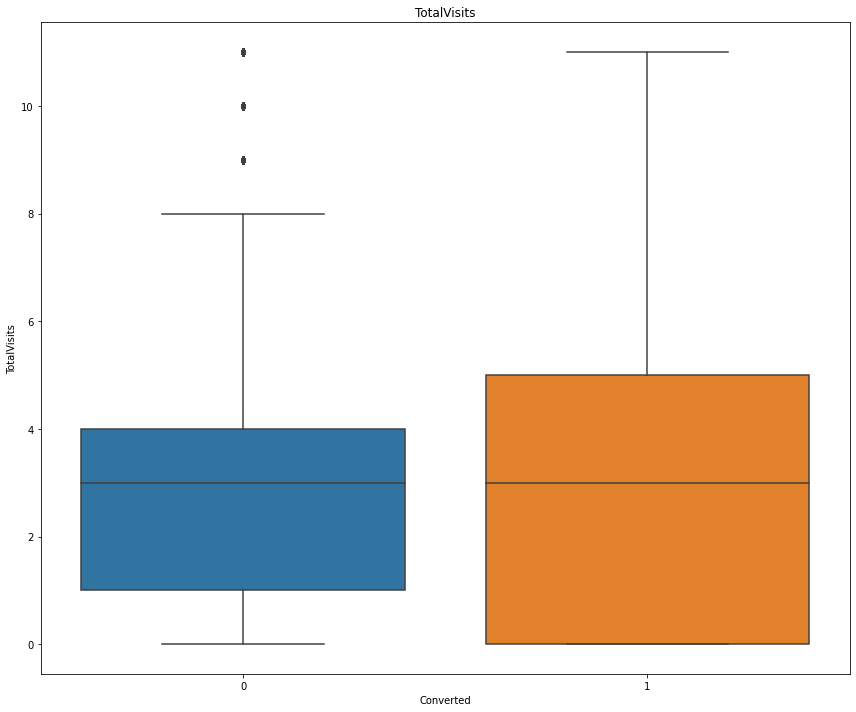

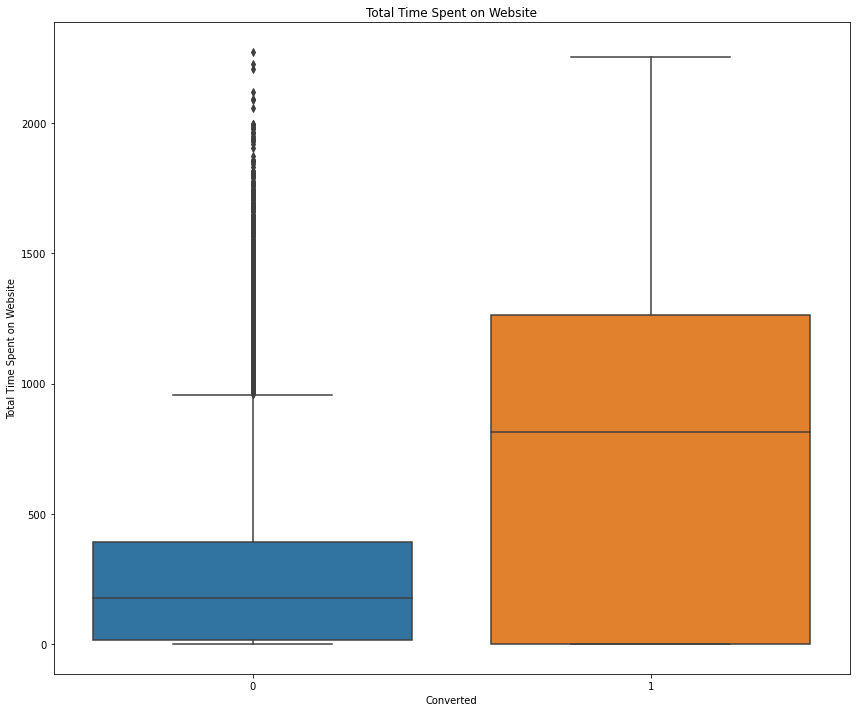

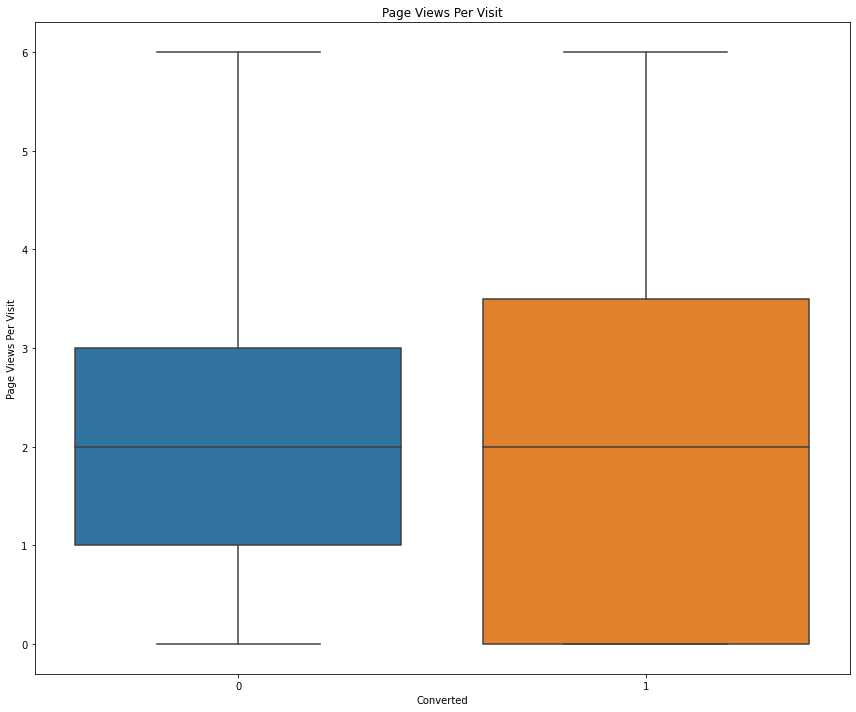

In [44]:
for col in final_num_cols:
    plt.figure(figsize = (12,10))
    plt.title(col)
    sns.boxplot(x='Converted', y=col, data = leads)
    plt.tight_layout()
    plt.show()

Having a Look at the above graphs we can say much from Totalvisits and Page Views per Visit as they have approximately same median but from the boxplot of Total Time Spent on website we can clearly see that if a lead spents more time on website there is higher chance of conversion

##### Multivariate Analysis on Numerical Columns

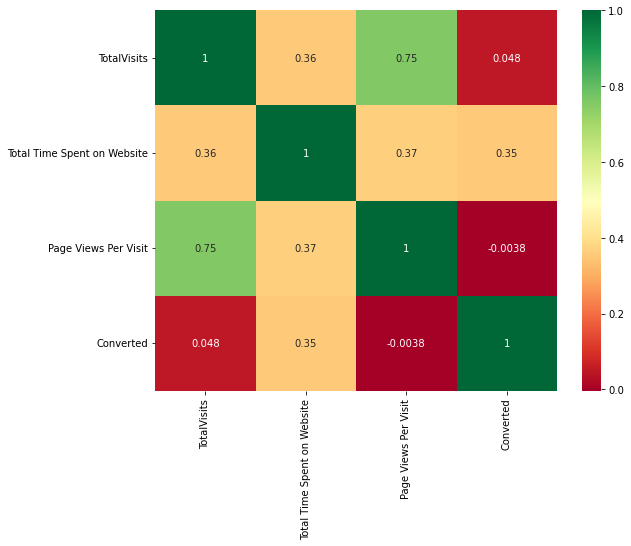

In [45]:
plt.figure(figsize = (9,7))
sns.heatmap(leads[final_num_cols + ['Converted']].corr(), cmap = "RdYlGn", annot = True)
plt.show()

from the above Heat Map we can see that Total TotalViews and Page Views per Website are highly correlated 
This can cause multi collinearity issues for the model we should drop one column to prevent this

In [46]:
# Dropping Page Views Per Visit

leads.drop('Page Views Per Visit', axis = 1, inplace = True)

In [47]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,Page Visited on Website,Unemployed,No
1,API,Organic Search,No,0,5.0,674,Email Opened,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,Email Opened,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,Other,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,Converted to Lead,Unemployed,No


In [48]:
final_num_cols = ['TotalVisits', 'Total Time Spent on Website']

# 3. Data Preparation

Mapping the Yes and No values to 1 and 0 respectively

In [49]:
leads["Do Not Email"] = leads["Do Not Email"].replace({"Yes": 1, "No": 0})
leads["A free copy of Mastering The Interview"] = leads["A free copy of Mastering The Interview"].replace({"Yes": 1, "No": 0})


In [50]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,Page Visited on Website,Unemployed,0
1,API,Organic Search,0,0,5.0,674,Email Opened,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,Email Opened,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,Other,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,Converted to Lead,Unemployed,0


In [51]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   int64  
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Last Activity                           9103 non-null   object 
 7   What is your current occupation         9103 non-null   object 
 8   A free copy of Mastering The Interview  9103 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 711.2+ KB


Creating Dummy Variables for other Categorical Columns 

In [52]:
Dummy_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation']

#Creating a dummy variable for above categorical variables and dropping the first one.
dummy = pd.get_dummies(leads[Dummy_cols], drop_first=True)

In [53]:
# Concatinating the dummy variables to the leads dataframe
leads = pd.concat([leads, dummy], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,Page Visited on Website,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,Email Opened,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,Email Opened,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,Other,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,Converted to Lead,Unemployed,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
#Dropping the original columns
leads.drop(Dummy_cols,axis=1,inplace=True)
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,5.0,674,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,1,2.0,1428,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [55]:
leads.shape

(9103, 29)

Now the Data is ready clean with all the required features splitting the data

### Train-Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# putting feature variable to X
X = leads.drop(['Converted'], axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,5.0,674,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,2.0,1428,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the Numerical Features

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

X_train[final_num_cols] = scaler.fit_transform(X_train[final_num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,0,-0.079783,1.476324,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5520,0,1.299804,-0.771066,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1962,0,0.610010,-0.571257,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1566,0,2.679391,1.393834,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9170,0,-1.114473,-0.881052,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


##### Seeing the correlation between all the features

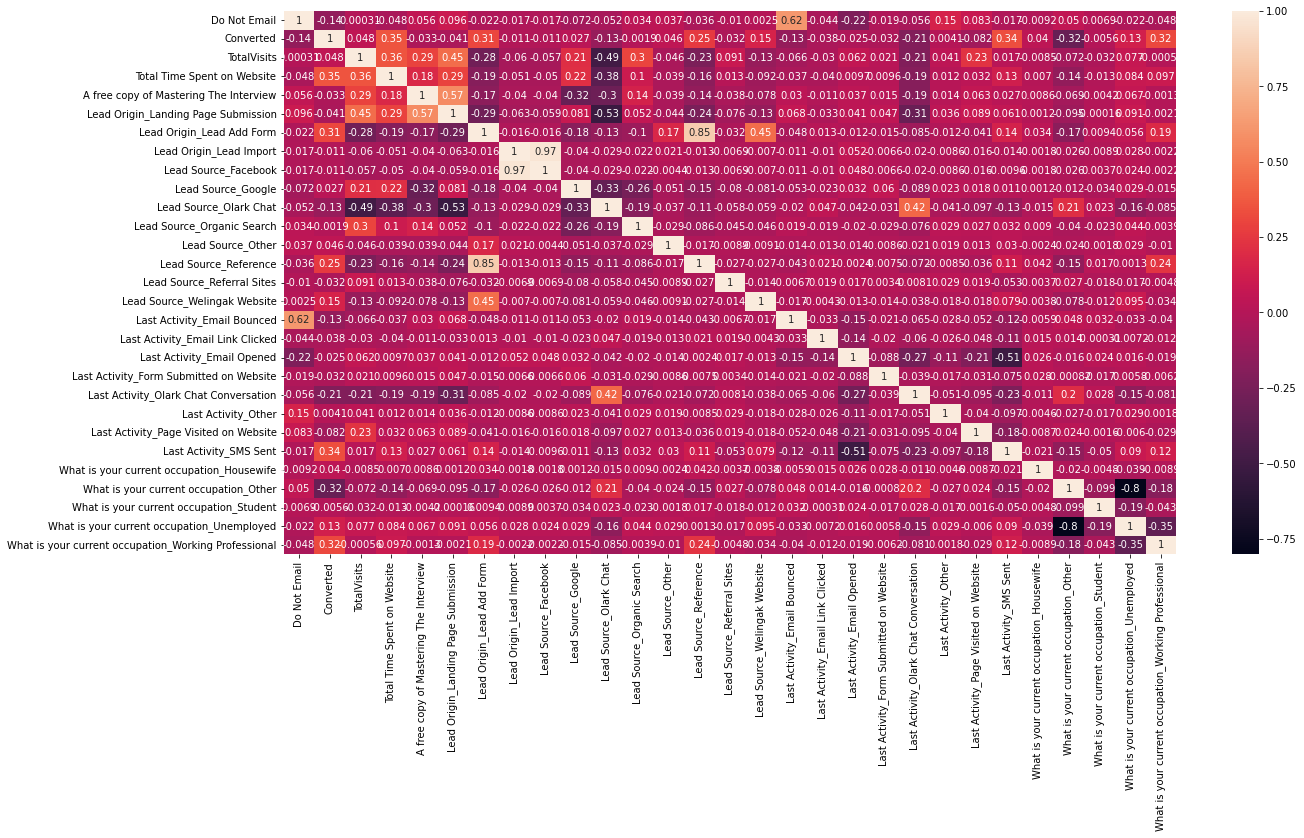

In [62]:
plt.figure(figsize= (20,10))
sns.heatmap(leads.corr(), annot = True)
plt.show()

###### We already know the conversion rate is around 38% approximately

Looking at the above heatmap we are not able to determine correlations building a raw model initially then using RFE to select the important features finally manually checking p-values and VIF to drop highly correlated features

# 4. Model Building

###### Raw Model

In [63]:
import statsmodels.api as sm

In [64]:
lograw = sm.GLM(y_train,(sm.add_constant(X_train)), family= sm.families.Binomial())
lograw.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.8
Date:                Sat, 18 Mar 2023   Deviance:                       5145.6
Time:                        23:47:00   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4012      1.064     -1.317      0.188      -3.486       0.683
Do Not Email                                            -1.3005      0.197     -6.596      0.000      -1.687      -0.914
TotalVisits                                              0.2483      0.047      5.324      0.000       0.157       0.340
Total Time Spent on Website                              1.1004      0.041     26.967      0.000       1.020       1.180
A free copy of Mastering The Interview                   0.0021      0.105      0.020      0.984      -0.205       0.209
Lead Origin_Landing Page Submission                     -0.3052      0.105     -2.902      0.004      -0.511      -0.099
Lead Origin_Lead Add Form                                3.0517      0.986      3.096      0.002       1.120       4.983
Lead Origin_Lead Import                                  1.1348      1.482      0.766      0.444      -1.769       4.039
Lead Source_Facebook                                    -0.0491      1.477     -0.033      0.974      -2.944       2.846
Lead Source_Google                                       0.1993      0.113      1.761      0.078      -0.023       0.421
Lead Source_Olark Chat                                   1.4755      0.161      9.176      0.000       1.160       1.791
Lead Source_Organic Search                              -0.0831      0.127     -0.656      0.512      -0.332       0.165
Lead Source_Other                                        0.9492      0.658      1.443      0.149      -0.340       2.239
Lead Source_Reference                                    0.7848      1.011      0.776      0.438      -1.197       2.767
Lead Source_Referral Sites                              -0.3406      0.359     -0.949      0.343      -1.044       0.363
Lead Source_Welingak Website                             2.6573      1.223      2.174      0.030       0.261       5.053
Last Activity_Email Bounced                              0.4761      0.417      1.141      0.254      -0.342       1.294
Last Activity_Email Link Clicked                         0.6308      0.303      2.083      0.037       0.037       1.224
Last Activity_Email Opened                               1.1972      0.219      5.471      0.000       0.768       1.626
Last Activity_Form Submitted on Website                  0.4309      0.390      1.105      0.269      -0.333       1.195
Last Activity_Olark Chat Conversation                   -0.3020      0.268     -1.128      0.259      -0.826       0.223
Last Activity_Other                                      1.7560      0.302      5.822      0.000       1.165       2.347
Last Activity_Page Visited on Website                    0

###### Feature Selection using RFE

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [66]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [67]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
        True, False, False,  True, False,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True])

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 14),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Other', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 12),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 11),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occu

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Other', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation', 'What is your current occupation_Student', 'What is your current occupation_Unemployed'], dtype='object')

#### Model 1

In [71]:
X_train_LR1 = sm.add_constant(X_train[col])
LR1 = sm.GLM(y_train,X_train_LR1, family= sm.families.Binomial())
LogReg_M1 = LR1.fit()
LogReg_M1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2599.5
Date:                Sat, 18 Mar 2023   Deviance:                       5199.1
Time:                        23:47:01   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4006
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2917      0.119    -19.335      0.000      -2.524      -2.059
Do Not Email                                            -1.2314      0.175     -7.019      0.000      -1.575      -0.888
Total Time Spent on Website                              1.1170      0.041     27.548      0.000       1.038       1.196
Lead Origin_Lead Add Form                                3.7588      0.763      4.926      0.000       2.263       5.254
Lead Origin_Lead Import                                  0.9470      0.451      2.101      0.036       0.064       1.830
Lead Source_Olark Chat                                   1.2682      0.104     12.161      0.000       1.064       1.473
Lead Source_Reference                                   -0.1129      0.792     -0.143      0.887      -1.666       1.440
Lead Source_Welingak Website                             1.7702      1.052      1.683      0.092      -0.292       3.832
Last Activity_Email Link Clicked                         0.7520      0.241      3.124      0.002       0.280       1.224
Last Activity_Email Opened                               1.3120      0.122     10.740      0.000       1.073       1.551
Last Activity_Other                                      1.8531      0.237      7.813      0.000       1.388       2.318
Last Activity_Page Visited on Website                    0.8528      0.178      4.785      0.000       0.504       1.202
Last Activity_SMS Sent                                   2.4166      0.125     19.364      0.000       2.172       2.661
What is your current occupation_Housewife               23.1530    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                   -1.2032      0.087    -13.822      0.000      -1.374      -1.033
What is your current occupation_Working Professional     2.5583      0.188     13.597      0.000       2.190       2.927
========================================================================================================================
"""

In [72]:
# Checking VIF values of features to check if there is any multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creating a table that will contain all the features and their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,18.23
5,Lead Source_Reference,14.02
6,Lead Source_Welingak Website,5.09
13,What is your current occupation_Other,1.43
4,Lead Source_Olark Chat,1.42
1,Total Time Spent on Website,1.30
11,Last Activity_SMS Sent,1.29
8,Last Activity_Email Opened,1.27
14,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11


Lead Source_Reference Has both High Multi- Colinearity and High Significance Hence dropping it and building a model

In [73]:
col = col.drop('Lead Source_Reference')

In [74]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Other', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Working Professional'], dtype='object')

#### Model 2

In [75]:
X_train_LR2 = sm.add_constant(X_train[col])
LR2 = sm.GLM(y_train,X_train_LR2, family= sm.families.Binomial())
LogReg_M2 = LR2.fit()
LogReg_M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2599.6
Date:                Sat, 18 Mar 2023   Deviance:                       5199.1
Time:                        23:47:01   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4006
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2920      0.119    -19.340      0.000      -2.524      -2.060
Do Not Email                                            -1.2295      0.175     -7.033      0.000      -1.572      -0.887
Total Time Spent on Website                              1.1170      0.041     27.549      0.000       1.038       1.196
Lead Origin_Lead Add Form                                3.6551      0.223     16.391      0.000       3.218       4.092
Lead Origin_Lead Import                                  0.9471      0.451      2.101      0.036       0.064       1.831
Lead Source_Olark Chat                                   1.2683      0.104     12.163      0.000       1.064       1.473
Lead Source_Welingak Website                             1.8735      0.760      2.464      0.014       0.383       3.364
Last Activity_Email Link Clicked                         0.7516      0.241      3.122      0.002       0.280       1.224
Last Activity_Email Opened                               1.3121      0.122     10.740      0.000       1.073       1.552
Last Activity_Other                                      1.8536      0.237      7.818      0.000       1.389       2.318
Last Activity_Page Visited on Website                    0.8529      0.178      4.786      0.000       0.504       1.202
Last Activity_SMS Sent                                   2.4170      0.125     19.371      0.000       2.172       2.662
What is your current occupation_Housewife               23.1523    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                   -1.2032      0.087    -13.822      0.000      -1.374      -1.033
What is your current occupation_Working Professional     2.5581      0.188     13.596      0.000       2.189       2.927
========================================================================================================================
"""

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.57
12,What is your current occupation_Other,1.43
4,Lead Source_Olark Chat,1.42
5,Lead Source_Welingak Website,1.32
1,Total Time Spent on Website,1.30
10,Last Activity_SMS Sent,1.29
7,Last Activity_Email Opened,1.27
13,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.11
9,Last Activity_Page Visited on Website,1.06


All the VIF values are less than 5 but 
What is your current occupation_Housewife has Highsgnificance on 99% hence dropping it

In [77]:
col = col.drop('What is your current occupation_Housewife')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Other', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'What is your current occupation_Other', 'What is your current occupation_Working Professional'], dtype='object')

#### Model 3

In [78]:
X_train_LR3 = sm.add_constant(X_train[col])
LR3 = sm.GLM(y_train,X_train_LR3, family= sm.families.Binomial())
LogReg_M3 = LR3.fit()
LogReg_M3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.1
Date:                Sat, 18 Mar 2023   Deviance:                       5212.2
Time:                        23:47:01   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3994
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2777      0.118    -19.289      0.000      -2.509      -2.046
Do Not Email                                            -1.2321      0.175     -7.050      0.000      -1.575      -0.890
Total Time Spent on Website                              1.1164      0.040     27.570      0.000       1.037       1.196
Lead Origin_Lead Add Form                                3.6582      0.223     16.409      0.000       3.221       4.095
Lead Origin_Lead Import                                  0.9391      0.450      2.085      0.037       0.056       1.822
Lead Source_Olark Chat                                   1.2609      0.104     12.107      0.000       1.057       1.465
Lead Source_Welingak Website                             1.8629      0.760      2.451      0.014       0.373       3.353
Last Activity_Email Link Clicked                         0.7517      0.240      3.137      0.002       0.282       1.221
Last Activity_Email Opened                               1.3077      0.122     10.739      0.000       1.069       1.546
Last Activity_Other                                      1.8416      0.237      7.773      0.000       1.377       2.306
Last Activity_Page Visited on Website                    0.8408      0.178      4.724      0.000       0.492       1.190
Last Activity_SMS Sent                                   2.4052      0.124     19.332      0.000       2.161       2.649
What is your current occupation_Other                   -1.2082      0.087    -13.889      0.000      -1.379      -1.038
What is your current occupation_Working Professional     2.5505      0.188     13.563      0.000       2.182       2.919
========================================================================================================================
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.57
11,What is your current occupation_Other,1.43
4,Lead Source_Olark Chat,1.42
5,Lead Source_Welingak Website,1.32
1,Total Time Spent on Website,1.30
10,Last Activity_SMS Sent,1.29
7,Last Activity_Email Opened,1.27
12,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.11
9,Last Activity_Page Visited on Website,1.06


Here we can see that VIF off all the features is less than 5 and Significance is less than 5%
We can consider Model 3 as our final model

Predicting The Values on the Train Set

In [80]:
y_train_pred = LogReg_M3.predict(X_train_LR3)
y_train_pred[:10]

7962    0.855167
5520    0.138146
1962    0.375133
1566    0.958379
9170    0.333441
5097    0.130008
8954    0.483977
309     0.195395
5519    0.309290
1050    0.568346
dtype: float64

In [81]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.8551671 , 0.13814621, 0.37513302, 0.95837915, 0.33344078,
       0.13000848, 0.48397686, 0.19539515, 0.30929001, 0.56834615])

In [82]:
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['lead_id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,lead_id
0,0,0.855167,7962
1,0,0.138146,5520
2,0,0.375133,1962
3,1,0.958379,1566
4,0,0.333441,9170


Creating a new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [83]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,lead_id,predicted
0,0,0.855167,7962,1
1,0,0.138146,5520,0
2,0,0.375133,1962,0
3,1,0.958379,1566,1
4,0,0.333441,9170,0


In [84]:
from sklearn import metrics

#### Confusion matrix

In [85]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3532  421]
 [ 733 1686]]


In [86]:
# Predicted      not_converted       Converted
# Actual            
# not_converted     3532                421         
# converted          733               1686

###### Overall Accuracy`

In [87]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8188951663527935


Here we can say that there is accuracy of about 82%
Which is similar to what the CEO of X-Education wanted above 80%

###### Sensitivity and Specificity

In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
# Sensitivity
TP / float(TP+FN)

0.6969822240595287

In [90]:
# Specificity
TN / float(TN+FP)

0.893498608651657

In [91]:
# false positive rate - predicting converted when they did not convert
FP / float(TN+FP)

0.10650139134834304

In [92]:
# positive predictive value
TP / float( TP + FP)

0.8001898433792122

In [93]:
# Negative predictive value
TN / float(TN+FN)

0.8281359906213365

### Plotting ROC Curve

In [94]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr,tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                        drop_intermediate = False )

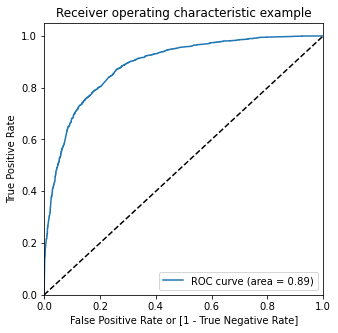

In [96]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

###### Finding Optimal Cutoff point

In [97]:
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,lead_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.855167,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.138146,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.375133,1962,0,1,1,1,1,0,0,0,0,0,0
3,1,0.958379,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.333441,9170,0,1,1,1,1,0,0,0,0,0,0


In [98]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.610326  0.975196  0.387048
0.2   0.2  0.750471  0.916494  0.648874
0.3   0.3  0.789705  0.871848  0.739438
0.4   0.4  0.813559  0.762712  0.844675
0.5   0.5  0.818895  0.696982  0.893499
0.6   0.6  0.798023  0.586193  0.927650
0.7   0.7  0.783427  0.517156  0.946370
0.8   0.8  0.758475  0.416701  0.967620
0.9   0.9  0.711707  0.261678  0.987098


Plotting accuracy sensitivity and specificity for various probabilities

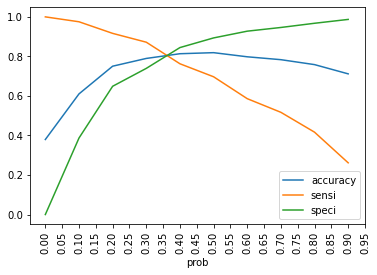

In [99]:
cutoff_df.plot.line(x='prob', y= ['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05), rotation=90)
plt.show()

From the above graph we can see that 0.35 is the optimal cutoff point

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,lead_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.855167,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.138146,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.375133,1962,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.958379,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.333441,9170,0,1,1,1,1,0,0,0,0,0,0,0


In [101]:
# checking the overall accuracy at 0.35 probability
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8046139359698682


In [102]:
# confusion matrix for 0.35 probability
con_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(con_mat)

[[3196  757]
 [ 488 1931]]


In [103]:
# Predicted      not_converted       Converted
# Actual            
# not_converted     3196                757         
# converted          488               1931

###### Sensitivity and Specificity

In [104]:
TP = con_mat[1,1] # true positive 
TN = con_mat[0,0] # true negatives
FP = con_mat[0,1] # false positives
FN = con_mat[1,0] # false negatives

In [105]:
# Sensitivity
TP / float(TP+FN)

0.7982637453493179

In [106]:
# Specificity
TN / float(TN+FP)

0.808499873513787

In [107]:
# false positive rate - predicting converted when they did not convert
FP / float(TN+FP)

0.191500126486213

In [108]:
# positive predictive value
TP / float( TP + FP)

0.7183779761904762

In [109]:
# Negative predictive value
TN / float(TN+FN)

0.8675352877307275

### Accuracy   : 80.5%
### Sensitivity : 79.8%
### Specificity : 80.8%

###### Precision and Recall

In [110]:
#precision
TP/(TP+FP)

0.7183779761904762

In [111]:
# recall
TP/(TP+FN)

0.7982637453493179

In [112]:
# using sklearn.mwtrics to get Precision and Recall

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7183779761904762
0.7982637453493179


###### plotting precision_recall_curve

In [113]:
from sklearn.metrics import precision_recall_curve

In [114]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

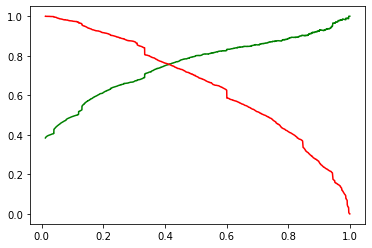

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 5. Model Evaluation

###### Making predictions on the test set

In [116]:
X_test[final_num_cols] = scaler.transform(X_test[final_num_cols])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Working Professional
3504,0,-0.103815,0,0,0,0,0,1,0,0,0,0,0
4050,0,-0.881052,1,0,0,0,0,0,0,0,1,0,0
7201,1,0.424120,0,0,0,0,0,0,0,0,1,0,0
1196,0,-0.105648,0,0,0,0,0,1,0,0,0,0,0
8219,0,-0.428274,0,0,0,0,0,0,0,1,0,0,0


In [117]:
X_test_sm = sm.add_constant(X_test)

In [118]:
y_test_pred = LogReg_M3.predict(X_test_sm)
y_test_pred[:10]

3504    0.252403
4050    0.942789
7201    0.347262
1196    0.252017
8219    0.128423
8747    0.130008
9048    0.300440
6524    0.051697
7693    0.143394
8187    0.942789
dtype: float64

In [119]:
#converting y_test_pred from array to dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.252403
4050,0.942789
7201,0.347262
1196,0.252017
8219,0.128423


In [120]:
# converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [121]:
# making index the lead_id
y_test_df['lead_id'] = y_test_df.index

In [122]:
# removing index from both df and appending them
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [123]:
y_pred_final = pd.concat([y_test_df,y_pred_1], axis = 1)
y_pred_final.head()

,Converted,lead_id,0
0,0,3504,0.252403
1,1,4050,0.942789
2,0,7201,0.347262
3,0,1196,0.252017
4,1,8219,0.128423


In [124]:
# renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,lead_id,Converted_prob
0,0,3504,0.252403
1,1,4050,0.942789
2,0,7201,0.347262
3,0,1196,0.252017
4,1,8219,0.128423


In [125]:
# applying the same cutoff of 0.35 we got earlier from optimal cutoff
y_pred_final['predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,lead_id,Converted_prob,predicted
0,0,3504,0.252403,0
1,1,4050,0.942789,1
2,0,7201,0.347262,0
3,0,1196,0.252017,0
4,1,8219,0.128423,0


##### Overall Accuracy

In [126]:
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted))

0.80483339436104


In [127]:
test_con_mat = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted)
test_con_mat

array([[1372,  317],
       [ 216,  826]], dtype=int64)

In [128]:
TP = test_con_mat[1,1] # true positive 
TN = test_con_mat[0,0] # true negatives
FP = test_con_mat[0,1] # false positives
FN = test_con_mat[1,0] # false negatives

In [129]:
# Test Sensitivity
TP / float(TP+FN)

0.7927063339731286

In [130]:
# Test Specifivity
TN / float(TN+FP)

0.8123149792776792

### Test and Train Results

#### Train Accuracy   : 80.5%           ||        Test Accuracy   : 80.5%
#### Train Sensitivity : 79.8 %            ||      Test Sensitivity : 79.3%
#### Train Specifivity : 80.8%               ||    Test Specifivity : 81. 2%

Assigning lead Score to the leads using higher the score means lead is hot with more chance of conversion and lower the score means less chance of conversion

### Lead Score Assigning

In [131]:
Lead_score_df = y_train_pred_final[['lead_id', 'Converted', 'Converted_prob','final_predicted']]

In [132]:
Lead_score_df.head()

,lead_id,Converted,Converted_prob,final_predicted
0,7962,0,0.855167,1
1,5520,0,0.138146,0
2,1962,0,0.375133,1
3,1566,1,0.958379,1
4,9170,0,0.333441,0


In [133]:
Lead_score_df['lead_score'] = Lead_score_df.Converted_prob.map(lambda x: round((x*100),2))
Lead_score_df.head()

,lead_id,Converted,Converted_prob,final_predicted,lead_score
0,7962,0,0.855167,1,85.52
1,5520,0,0.138146,0,13.81
2,1962,0,0.375133,1,37.51
3,1566,1,0.958379,1,95.84
4,9170,0,0.333441,0,33.34


Finally from the above model is concluded as the results on the train value and test values are approximately similar
And the leads are given a final lead score using which sales team can determine if the lead is hot or not
The main features effecting the conversion of the leads are following
- Lead Origin_Lead Add Form
- What is your current occupation_Working Professional
- Last Activity_SMS Sent


Followed by these Features
- Lead Source_Welingak Website
- Last Activity_Other
- Last Activity_Email Opened